*프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기*

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import tensorflow as tf
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

**(적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.**

(1080, 1920, 3)


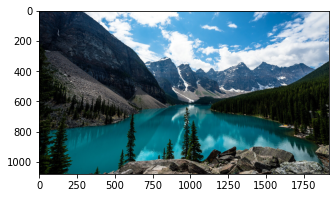

In [112]:
img_path = os.getenv('HOME') + '/aiffel/landscape1.jpeg'

img_orig = cv2.imread(img_path)
img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

print(img_orig.shape)
plt.figure(figsize=(6, 3))
plt.imshow(img_orig)

**불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다. cv2.resize()를 사용했습니다.**

(270, 480, 3)


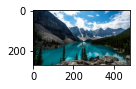

In [113]:
res_image = cv2.resize(img_orig, dsize=(1920//4, 1080//4))

print(res_image.shape)

plt.figure(figsize=(3, 1))
plt.imshow(res_image)

**apply_srgan 함수를 사용하여 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다.**

In [114]:
model_file = os.getenv('HOME')+'/aiffel/super_resolution/srcnn.h5'
srgan = tf.keras.models.load_model(model_file)

In [115]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [116]:
srgan_hr = apply_srgan(res_image)

**cv2.resize()를 이용하여 2.의 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다.**

In [118]:
bicubic_hr = cv2.resize(
    res_image, 
    dsize=(1920, 1080), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

In [117]:
srgan_hr = cv2.resize(
    res_image, 
    dsize=(1920, 1080), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

**3개 이미지( Bicubic의 결과, SRGAN의 결과, 원래 고해상도 이미지)를 나란히 시각화합니다.**

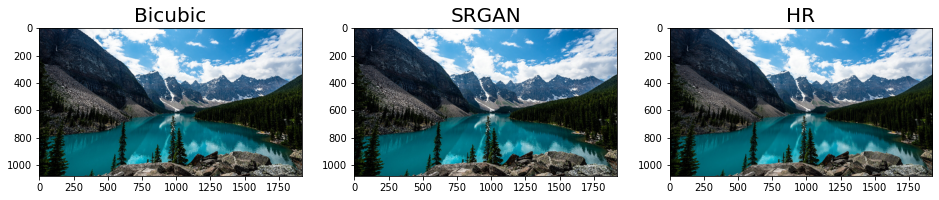

In [119]:
images = [bicubic_hr, srgan_hr, img_orig]
titles = ["Bicubic", "SRGAN", "HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(image)
    plt.title(title, fontsize=20)

**전체 화면으로는 구분이 잘 가지 않아서 crop함수를 사용해 부분만을 보겠습니다.**

Text(0.5, 1.0, 'HR')

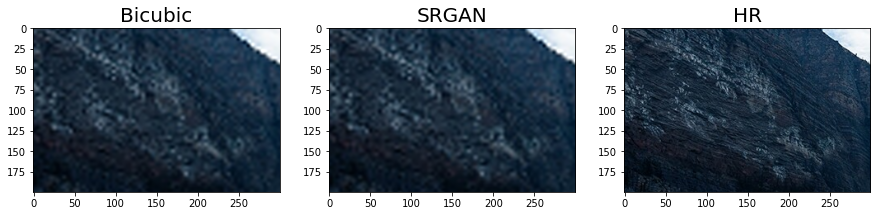

In [120]:
def crop(image, left_top, x=200, y=300):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]


# interpolation된 이미지와 srgan 이미지와 고해상도 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (200, 300)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_srgan_hr = crop(srgan_hr, left_top)
crop_image = crop(image, left_top)


# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,3,1); plt.imshow(crop_bicubic_hr); plt.title("Bicubic", fontsize=20)
plt.subplot(1,3,2); plt.imshow(crop_srgan_hr); plt.title("SRGAN", fontsize=20)
plt.subplot(1,3,3); plt.imshow(crop_image); plt.title("HR", fontsize=20)


**다양한 부분을 잘라내어 봤지만 SRGAN이 Bicubic보다 압도적으로 성능이 앞선다고 말하기에는 어렵다고 느꼈습니다.**

**프로젝트 1-2.**

1.(적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.<br>
2.불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.<br>
3.1.에서 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. cv2.resize()를 사용해 봅시다.<br>
4.2개 이미지(3.의 Bicubic의 결과, 2.의 SRGAN의 결과)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.<br>
5.선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)


**(적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.**

(213, 320, 3)


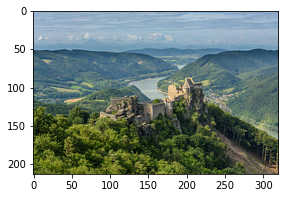

In [121]:
img_path2 = os.getenv('HOME') + '/aiffel/low_landscape.jpeg'

img_orig2 = cv2.imread(img_path2)
img_orig2 = cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB)

print(img_orig2.shape)
plt.figure(figsize=(6, 3))
plt.imshow(img_orig2)

**불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다.**

In [122]:
def apply_srgan(image2):
    image2 = tf.cast(image2[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image2)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [123]:
srgan_hr2 = apply_srgan(img_orig2)

**불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다.**

In [124]:
srgan_hr2 = cv2.resize(
    img_orig2, 
    dsize=(1280, 852), # 저해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

In [125]:
bicubic_hr2 = cv2.resize(
    img_orig2, 
    dsize=(1280, 852), # 저해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

**2개 이미지(Bicubic의 결과, SRGAN의 결과)를 나란히 시각화합니다.**

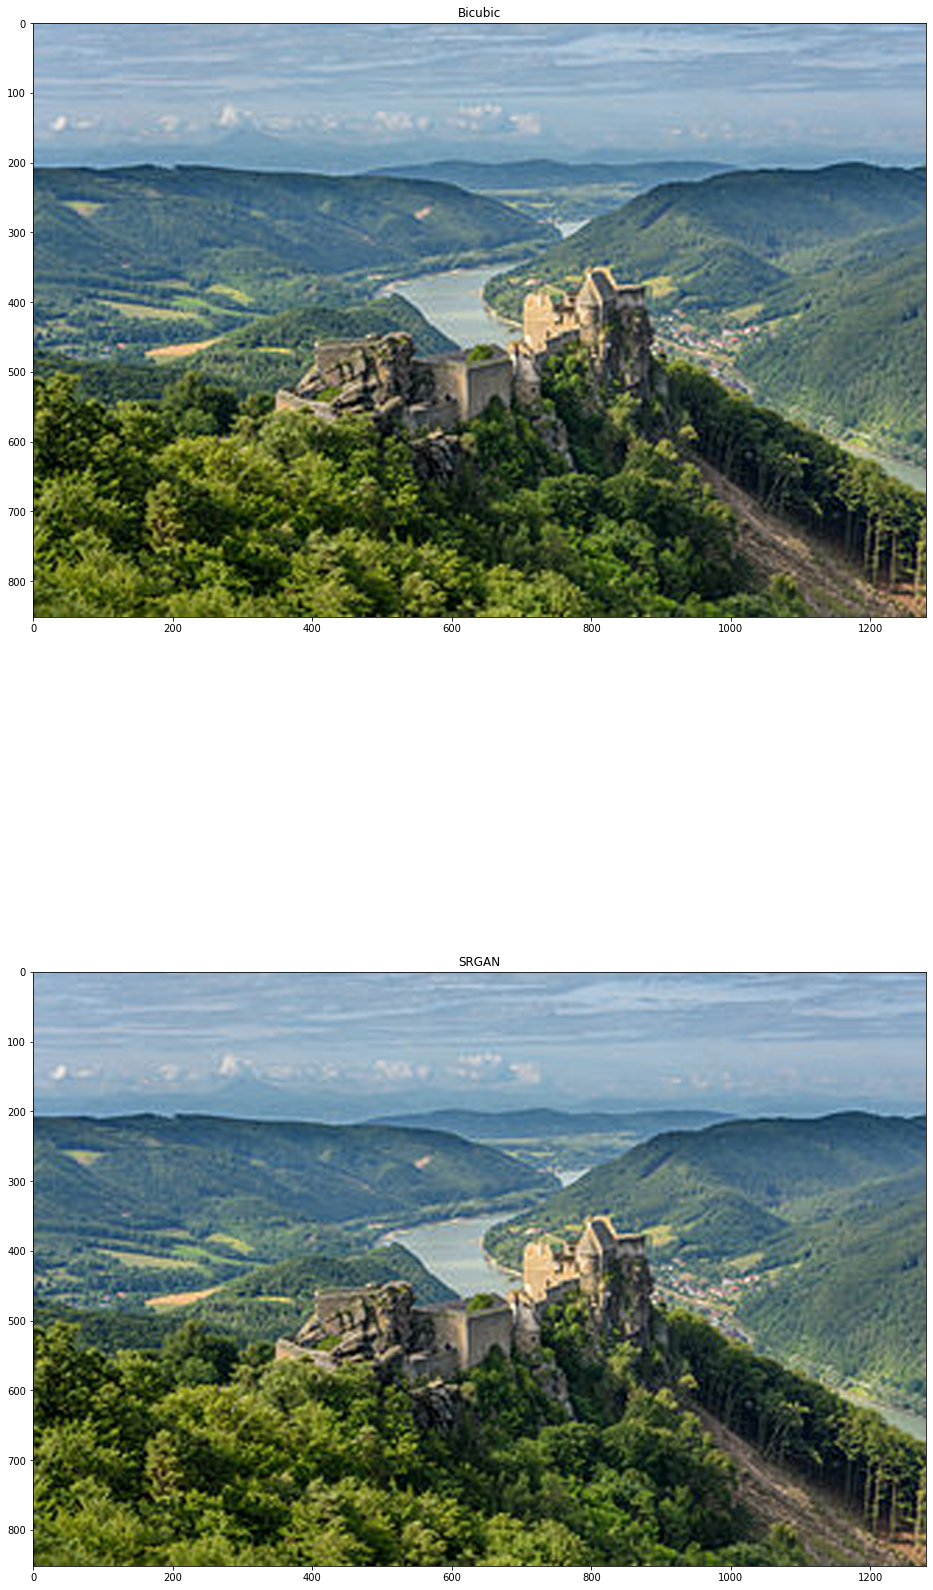

In [126]:
images = [bicubic_hr2, srgan_hr2]
titles = ["Bicubic", "SRGAN"]


plt.figure(figsize=(16,32))
for i in range(2):
    plt.subplot(2,1,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])

**역시 전체 화면으로는 구분이 잘 가지 않아서 crop함수를 사용해 부분만을 보겠습니다.**

Text(0.5, 1.0, 'SRGAN')

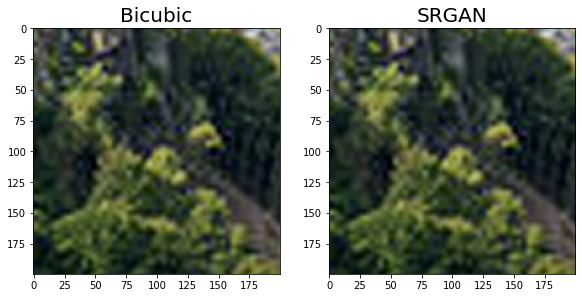

In [127]:
def crop(image2, left_top, x=200, y=200):
    return image2[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]


# interpolation된 이미지와 srgan 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (500, 800)
crop_bicubic_hr2 = crop(bicubic_hr2, left_top)
crop_srgan_hr2 = crop(srgan_hr2, left_top)


# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,3,1); plt.imshow(crop_bicubic_hr2); plt.title("Bicubic", fontsize=20)
plt.subplot(1,3,2); plt.imshow(crop_srgan_hr2); plt.title("SRGAN", fontsize=20)

**역시 다양한 부분을 잘라내어 봤지만 SRGAN이 Bicubic보다 압도적으로 성능이 앞선다고 말하기에는 어렵다고 느꼈습니다.**

*프로젝트 2 : SRGAN을 이용해 고해상도 gif 생성하기*

In [128]:
gif_path = os.getenv('HOME') + '/aiffel/fire_lr.gif'

In [129]:
import cv2

# 다운받은 파일의 경로를 설정해 주세요.
gif = cv2.VideoCapture(gif_path)

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 14
frame 크기 : (282, 300, 3)


In [130]:
# Bicubic interpolation
Bicubic_frames = []
for frame in frames:
    bc = cv2.resize(
        frame,
        dsize = (frame.shape[1]*4, frame.shape[0]*4),
        interpolation = cv2.INTER_CUBIC
    )
    Bicubic_frames.append(bc)

In [131]:
frames_sr = []
for frame in frames:
    srgan_frame = apply_srgan(frame)
    frames_sr.append(srgan_frame)

In [132]:
import imageio

imageio.mimsave("bicubic.gif", Bicubic_frames)
imageio.mimsave("srgan.gif", frames_sr)

In [133]:
from IPython.display import Image as show_gif

**총평**<br>
**우선 Bicubic과 SRGAN의 성능차이가 명확하게 비교되어 출력이 된 것이 아니라서 아쉬움이 남습니다.<br> 
저해상도 화질의 이미지를 고해상도 화질로 변환해주는 Super Resolution라는 개념을 알게 되어 좋았고<br>
기회가 된다면 다음에는 더 정밀한 학습을 해보고싶습니다 :)**